# Rishika Tibrewal, MDS202135

# CV Assignment 2

## Q 7

In [1]:
# !pip install opencv-contrib-python

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

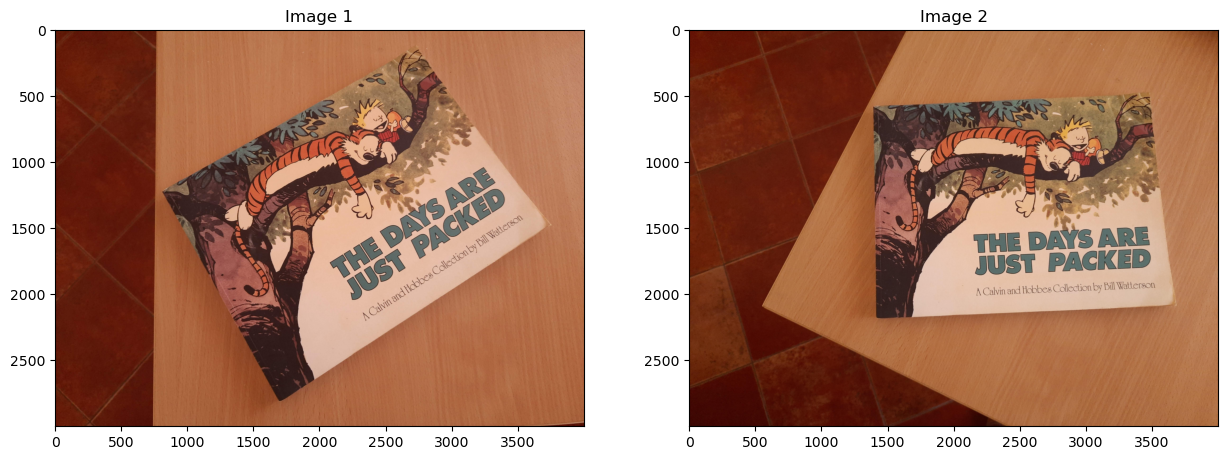

In [42]:
# Reading images
img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')
img3 = cv2.imread('image3.jpg')

# Displaying images
fig, ax = plt.subplots(1,2,figsize=(15, 15))
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Image 1')
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Image 2');

### a)

In [43]:
# top-left, bottom-left, bottom-right, top-right
pts1 = np.array([[811, 1227], [1695, 2810],  [3755, 1479], [2732, 124]])
pts2 = np.array([[1394, 588], [1417, 2179],  [3687, 2087], [3484, 477]])

### b) For the homography, we assume that the coordinates in homogeneous form are $(x_1, y_1, 1)$ for image 1 and $(x_2, y_2, 1)$ for image 2

In [44]:
def calculate_A(pts1, pts2, n=4):
    A = []

    for i in range(0, n):
        x_1, y_1 = pts1[i, 0], pts1[i, 1]
        x_2, y_2 = pts2[i, 0], pts2[i, 1]

        A.append([0, 0, 0, -x_1, -y_1, -1, y_2*x_1, y_2*y_1, y_2])
        A.append([x_1, y_1, 1, 0, 0, 0, -x_2*x_1, -x_2*y_1, -x_2])

    assert (np.shape(A) == (2*n, 9))
    return np.asarray(A)

In [45]:
A = calculate_A(pts1, pts2)

In [52]:
A

array([[        0,         0,         0,      -811,     -1227,        -1,
           476868,    721476,       588],
       [      811,      1227,         1,         0,         0,         0,
         -1130534,  -1710438,     -1394],
       [        0,         0,         0,     -1695,     -2810,        -1,
          3693405,   6122990,      2179],
       [     1695,      2810,         1,         0,         0,         0,
         -2401815,  -3981770,     -1417],
       [        0,         0,         0,     -3755,     -1479,        -1,
          7836685,   3086673,      2087],
       [     3755,      1479,         1,         0,         0,         0,
        -13844685,  -5453073,     -3687],
       [        0,         0,         0,     -2732,      -124,        -1,
          1303164,     59148,       477],
       [     2732,       124,         1,         0,         0,         0,
         -9518288,   -432016,     -3484]])

The system of equations becomes, AH=0 where A is a 8x9 matrix, H is a 9x1 column vector with the 9 entries of 3x3 homography matrix. 

$$-811*h_4 - 1227*h_5 - 1*h_6 + 476868*h_7 + 721476*h_8 + 588*h_9 = 0$$
$$811*h_1 +  1227*h_2 + 1*h_3 - 1130534*h_7 - 1710438 *h_8 - 1394*h_9 = 0$$
$$-1695*h_4 - 2810*h_5 - 1*h_6 + 3693405*h_7 + 6122990*h_8 + 2179*h_9=0$$
$$1695*h_1 + 2810*h_2 + 1*h_3 - 2401815*h_7 - 3981770*h_8 - 1417*h_9=0$$
$$-3755*h_4 - 1479*h_5 - 1*h_6 + 7836685*h_7 + 3086673*h_8 + 2087*h_9=0$$
$$3755*h_1 + 1479*h_2 + 1*h_3 - 13844685*h_7 - 5453073*h_8 - 3687*h_9=0$$
$$-2732*h_4 - 124*h_5 - 1*h_6 + 1303164*h_7 + 59148*h_8 + 477*h_9=0$$
$$2732*h_1 + 124*h_2 + 1*h_3 - 9518288*h_7 - 432016_8 - 3484*h_9=0$$

In [51]:
print("The rank of system of equations is ",np.linalg.matrix_rank(A))

The rank of system of equations is  8


In [47]:
def homography(pts1, pts2):

  # SVD of A
    U, S, V = np.linalg.svd(A)

  # Take h as last column of V
    h = V[-1, :]

  # Calculating homography
    H = h.reshape(3,3)
  
    return H

In [48]:
# Calculating homography between image1 and image2 and storing in H
H = homography(pts1, pts2)
print('Homography between image1 and image2:', H, sep='\n')

Homography between image1 and image2:
[[-5.02087447e-04  2.54217486e-04 -8.61659242e-01]
 [-2.70511153e-04 -5.63766057e-04  5.07486146e-01]
 [ 1.65049679e-08 -2.06432021e-08 -6.74517802e-04]]


## c)

In [49]:
# Calculating homography using opencv and storing in h
h, _ = cv2.findHomography(pts1, pts2)
print('Homography between image1 and image2 (calculated using OpenCV):', h, sep='\n')

Homography between image1 and image2 (calculated using OpenCV):
[[ 7.44365005e-01 -3.76887734e-01  1.27744477e+03]
 [ 4.01043757e-01  8.35806046e-01 -7.52368796e+02]
 [-2.44692843e-05  3.06043844e-05  1.00000000e+00]]


In [50]:
# Normalizing h to check whether it is a scalar multiple of H
h_new = h / np.linalg.norm(h)
print('Normalized h:', h_new, sep='\n')

Normalized h:
[[ 5.02087447e-04 -2.54217486e-04  8.61659242e-01]
 [ 2.70511153e-04  5.63766057e-04 -5.07486146e-01]
 [-1.65049679e-08  2.06432021e-08  6.74517802e-04]]


We can see that the homography matrices found using DLT and OpenCV are comparable with the normalised one (OpenCV) being a scalar multiple (-1) of the DLT one.

## d)

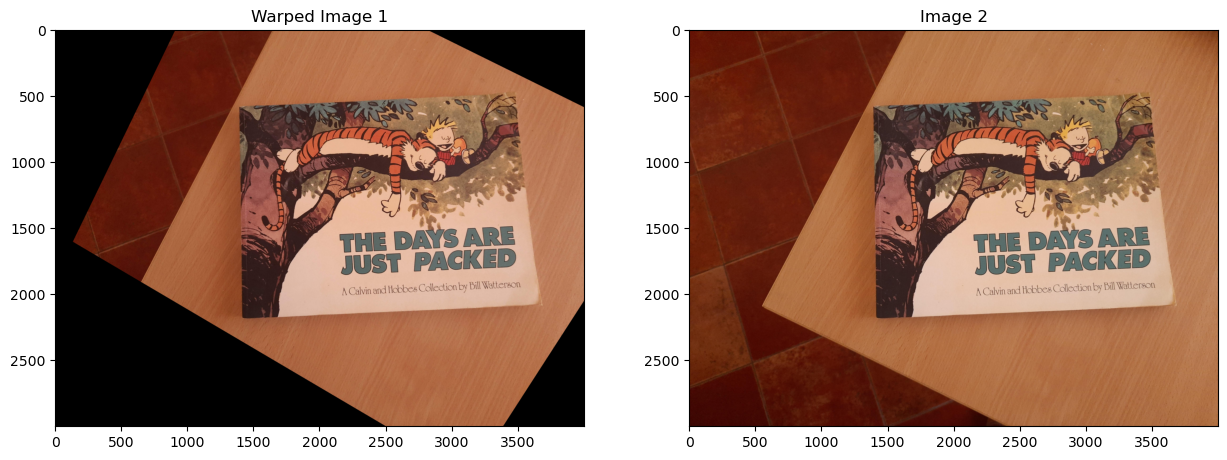

In [10]:
# Warping image1 
out = cv2.warpPerspective(img1, H ,(img2.shape[1], img2.shape[0]))
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
ax[0].set_title('Warped Image 1')
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Image 2');

Applying the homography on image1 has resulted in its 'rotation' or 'alignment' with image2, but a considerable amount of content (floor and table) of image1 is missing from the warped version, leaving black patches on the output. The reason being, the four points we had choses from image1, i.e. the source image, gets mapped on their corresponding points on image2 and along with that, all points from the image situated on the same plane undergo the same transformation. When we select a set of four (or more) points from the source image (here, image1), the plane on which these points reside in the real world gets aligned as the plane containing their four corresponding points in the destination image (here, image2). Thus, all points on that plane get aligned correctly as they are in the destination image. But the points that are not on that plane will not be aligned by the homography. These points get lost after the transformation leaving blank (black) pixels on the resulting picture.

## Q 8

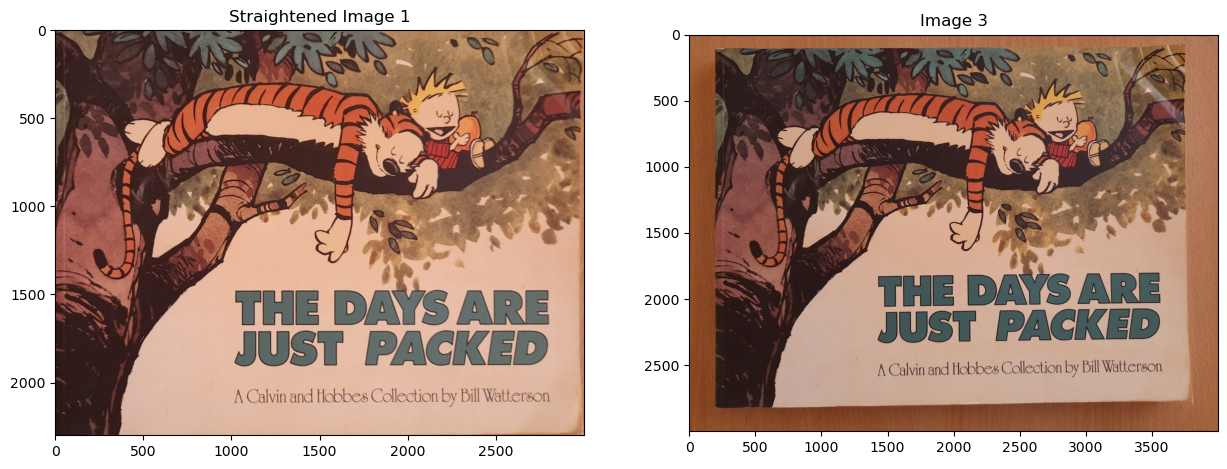

In [11]:
# top-left, bottom-left, bottom-right, top-right

# Corner points of the book on source image
pts1 = np.array([[811, 1227], [1695, 2810],  [3755, 1479], [2732, 124]])

# Keeping aspect ratio as 30/23, the image size can be taken as 3000x2300. Taking these points in such a way that the 
# corner points of image coincide with the corner points of the book which would make warped image to be similar to image 3
output_pts = np.array([[0,0], [0,2299], [2999,2299], [2999,0]]) 

# Calculating homography
H_new = homography(pts1, output_pts)

# Warping image
out = cv2.warpPerspective(img1, H_new ,(3000, 2300),flags=cv2.INTER_LINEAR)

fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
ax[0].set_title('Straightened Image 1')
ax[1].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax[1].set_title('Image 3');

## Q 9

### Perspective Correction

Our goal here is to transform the source image into a desired perspective. This can be done by computing the homography that maps the source points into the desired points. If we know the aspect ratio of the image, or the part of the image we want to correct the perspective of, this can be done quite easily.

For example, we have a picture of a notebook saved as "image4.jpeg" with the aspect ratio 16:9. We try to align the notebook parallely to the axes. 

Text(0.5, 1.0, 'Corrected Picture of Notebook')

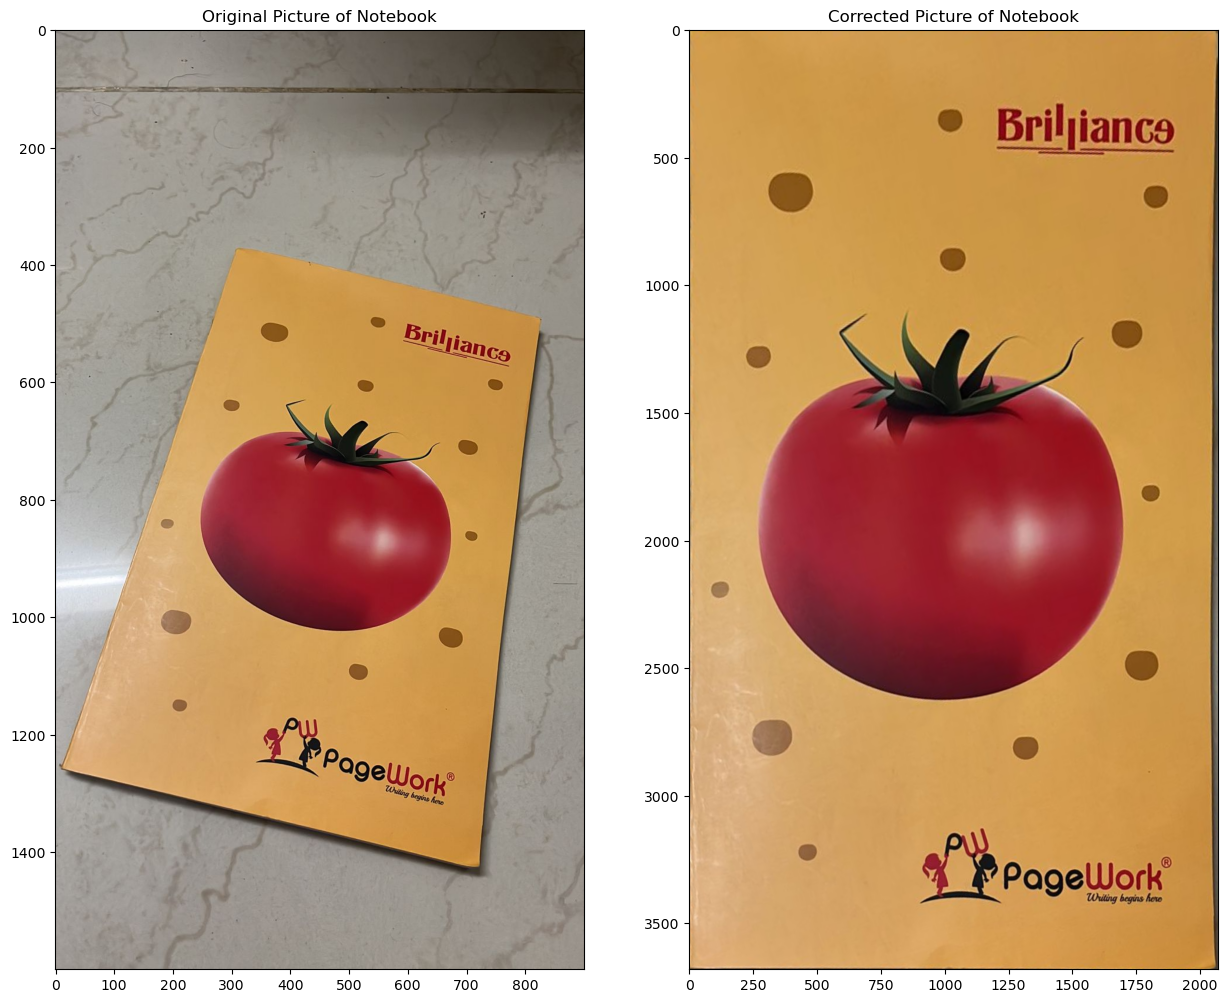

In [12]:
# Reading image
img1 = cv2.imread('image4.jpeg')

# Top left, bottom left, bottom right, top right corners of the paper
pts1 = np.array([[308, 375], [12, 1258], [723, 1426], [826, 492]])

# Keeping the aspect ratio as 16:9, the image size can be taken as 3680 x 2070
out_pts =  np.array([[0,0], [0,3675], [2065,3675], [2065,0]])

# Calculating homography
H_new = homography(pts1, out_pts)

# Warping image
out = cv2.warpPerspective(img1, H_new ,(2070, 3680), flags=cv2.INTER_LINEAR)

fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Picture of Notebook')
ax[1].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
ax[1].set_title('Corrected Picture of Notebook')

### 

### Image Stitching to get a panoramic view

Homography can also be used to stitch two images to get a panoramic view. We calculate the homography matrix of the 2 images, which require atleast 4 matches, to align the images. Once we have the homography for transformation, we can warp the image and stitch the two images.

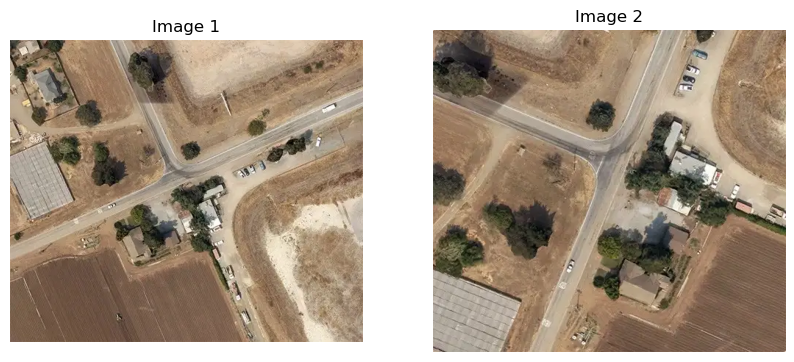

In [13]:
img_1 = cv2.imread('Image5.webp')

img_2 = cv2.imread('Image6.webp')

fig, ax = plt.subplots(1,2,figsize=(10,14))
ax[0].imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Image 1')
ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
ax[1].set_title('Image 2')
ax[1].axis('off')
#Convert the images to grayscale
img1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

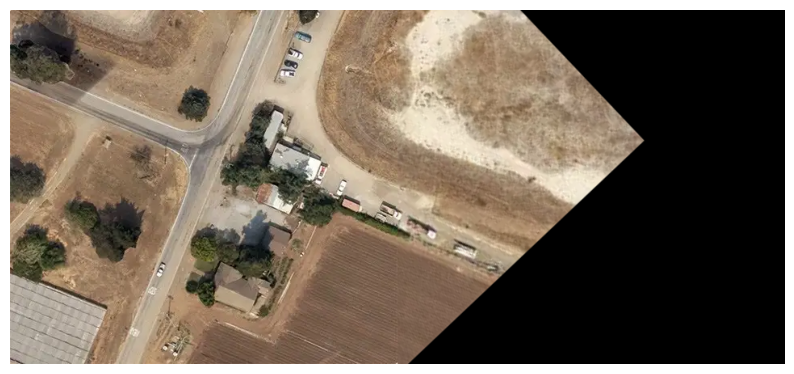

In [14]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
#Find Top M matches of descriptors of 2 images
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
good = []
for m in matches:
    if (m[0].distance < 0.5*m[1].distance):
        good.append(m)
matches = np.asarray(good)
if (len(matches[:,0]) >= 4):
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertionError('Can’t find enough keypoints.')
dst = cv2.warpPerspective(img_1,H,((img_1.shape[1] + img_2.shape[1]), img_2.shape[0])) #wraped image
dst[0:img_2.shape[0], 0:img_2.shape[1]] = img_2 #stitched image
plt.figure(figsize=(10,15))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()